# Density Estimation for a mixture of Gaussians (using GaussianMixtures.jl)

Adapted from http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

Plot the density estimation of a mixture of two Gaussians, then use cross-validation to find the optimal number of clusters. Data is generated from two Gaussians with different centers and covariance matrices.

In [1]:
using PyPlot, PyCall
using ScikitLearn
using ScikitLearn.Utils: meshgrid
using GaussianMixtures: GMM

@pyimport matplotlib.colors as mpl_colors

n_samples = 300

# generate random sample, two components
srand(42)

# generate spherical data centered on (20, 20)
shifted_gaussian = randn(n_samples, 2) .+ [20, 20]'

# generate zero centered stretched Gaussian data
C = [0. -0.7
     3.5 .7]
stretched_gaussian = randn(n_samples, 2) * C

# concatenate the two datasets into the final training set
X_train = vcat(shifted_gaussian, stretched_gaussian)

# fit a Gaussian Mixture Model with two components
clf = GMM(n_components=2, kind=:full)

fit!(clf, X_train)

INFO: Initializing GMM, 2 Gaussians diag covariance 2 dimensions using 600 data points


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       7.850874e+03
      1       5.165666e+03      -2.685208e+03 |        0
      2       5.165666e+03       0.000000e+00 |        0
K-means converged with 2 iterations (objv = 5165.666163455702)


INFO: K-means with 600 data points using 2 iterations
100.0 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 2 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.026541
INFO: iteration 2, average log likelihood -2.026538
INFO: iteration 3, average log likelihood -2.026538
INFO: iteration 4, average log likelihood -2.026538
INFO: iteration 5, average log likelihood -2.026538
INFO: iteration 6, average log likelihood -2.026538
INFO: iteration 7, average log likelihood -2.026538
INFO: iteration 8, average log likelihood -2.026538
INFO: iteration 9, average log likelihood -2.026538
INFO: iteration 10, average log likelihood -2.026538
INFO: EM with 600 data points 10 iterations avll -2.026538
54.5 data points per parameter


GMM{Float64} with 2 components in 2 dimensions and full covariance
Mix 1: weight 0.500000
mean: 1x2 Array{Float64,2}:
 -0.298301  -0.00712635
covariance: 2x2 Array{Float64,2}:
 13.964    2.89262
  2.89262  1.09462
Mix 2: weight 0.500000
mean: 1x2 Array{Float64,2}:
 19.9828  19.9162
covariance: 2x2 Array{Float64,2}:
  1.08001    -0.0117825
 -0.0117825   1.08029  


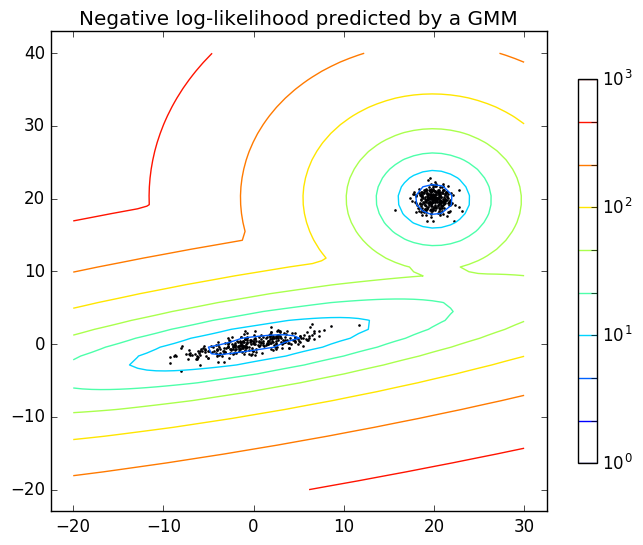

In [2]:
# display predicted scores by the model as a contour plot
x = linspace(-20.0, 30.0)
y = linspace(-20.0, 40.0)
X, Y = meshgrid(x, y)
XX = hcat(X[:], Y[:])
Z = -score_samples(clf, XX)

Z = reshape(Z, size(X))

CS = contour(X, Y, Z, norm=mpl_colors.LogNorm(vmin=1.0, vmax=1000.0),
             levels=logspace(0, 3, 10))
CB = colorbar(CS, shrink=0.8, extend="both")
scatter(X_train[:, 1], X_train[:, 2], .8)

title("Negative log-likelihood predicted by a GMM")
axis("tight");

#### Posterior probability of each data point

This computes the (posterior) probability of each point being in cluster 1 vs. cluster 2 (it's ordered because of the way we built X):

In [3]:
predict_proba(clf, X_train)

600x2 Array{Float64,2}:
 3.97461e-141  1.0         
 3.57557e-112  1.0         
 7.73662e-101  1.0         
 7.79742e-146  1.0         
 1.86899e-101  1.0         
 1.04168e-94   1.0         
 4.74714e-121  1.0         
 1.09878e-140  1.0         
 7.88034e-123  1.0         
 1.52832e-114  1.0         
 7.36057e-106  1.0         
 1.50613e-126  1.0         
 3.56267e-93   1.0         
 ⋮                         
 1.0           7.50692e-174
 1.0           4.34159e-115
 1.0           5.54185e-190
 1.0           6.1195e-198 
 1.0           3.20059e-152
 1.0           3.94132e-135
 1.0           1.38236e-112
 1.0           3.81567e-170
 1.0           3.25009e-181
 1.0           5.6759e-181 
 1.0           6.01246e-249
 1.0           3.3006e-147 

`predict` yields the cluster to which it belongs:

In [4]:
predict(clf, X_train)

600-element Array{Int64,1}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

# Grid-search to find the optimal number of clusters

In [5]:
using ScikitLearn.GridSearch

In [6]:
grid_search = fit!(GridSearchCV(GMM(n_components=3, kind=:full), Dict(:n_components=>[1,2,3,4,5,6])), X_train)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.821221e+04
      1       4.717918e+03      -1.349429e+04 |        2
      2       4.713803e+03      -4.115211e+00 |        0
      3       4.713803e+03       0.000000e+00 |        0
K-means converged with 3 iterations (objv = 4713.802531784696)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.482854e+03
      1       3.436488e+03      -1.046366e+03 |        0
      2       3.436488e+03       0.000000e+00 |        0
K-means converged with 2 iterations (objv = 3436.4881168493384)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.513648e+03
      1       2.162762e+03      -2.350886e+03 |        0
      2       2.162762e+03       0.000000e+00 |        0
K-means converged with 2 iteratio

INFO: Initializing GMM, 2 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 3 iterations
66.7 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 2 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.060321
INFO: iteration 2, average log likelihood -2.060312
INFO: iteration 3, average log likelihood -2.060312
INFO: iteration 4, average log likelihood -2.060312
INFO: iteration 5, average log likelihood -2.060312
INFO: iteration 6, average log likelihood -2.060312
INFO: iteration 7, average log likelihood -2.060312
INFO: iteration 8, average log likelihood -2.060312
INFO: iteration 9, average log likelihood -2.060312
INFO: iteration 10, average log likelihood -2.060312
INFO: EM with 400 data points 10 iterations avll -2.060312
36.4 data points per parameter
INFO: Initializing GMM, 2 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 2 iterati

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.779983e+03
      1       1.396880e+03      -3.831030e+02 |        2
      2       1.296204e+03      -1.006756e+02 |        2
      3       1.251941e+03      -4.426325e+01 |        2
      4       1.240744e+03      -1.119661e+01 |        0
      5       1.240744e+03       0.000000e+00 |        0
K-means converged with 5 iterations (objv = 1240.7441157403405)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       2.027605e+03
      1       1.219705e+03      -8.079005e+02 |        3
      2       1.110925e+03      -1.087801e+02 |        3
      3       1.085668e+03      -2.525635e+01 |        2
      4       1.081649e+03      -4.019731e+00 |        2
      5       1.078715e+03      -2.933943e+00 |        2
      6       1.077851e+03      -8.634101e-01 |        0
      7       1

INFO: K-means with 400 data points using 5 iterations
44.4 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 3 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -1.846966
INFO: iteration 2, average log likelihood -1.844312
INFO: iteration 3, average log likelihood -1.843706
INFO: iteration 4, average log likelihood -1.843485
INFO: iteration 5, average log likelihood -1.843385
INFO: iteration 6, average log likelihood -1.843333
INFO: iteration 7, average log likelihood -1.843302
INFO: iteration 8, average log likelihood -1.843284
INFO: iteration 9, average log likelihood -1.843271
INFO: iteration 10, average log likelihood -1.843262
INFO: EM with 400 data points 10 iterations avll -1.843262
23.5 data points per parameter
INFO: Initializing GMM, 4 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 7 iterations
33.3 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       2.064129e+03
      1       1.473136e+03      -5.909922e+02 |        5
      2       1.381896e+03      -9.123998e+01 |        5
      3       1.336459e+03      -4.543716e+01 |        5
      4       1.290968e+03      -4.549115e+01 |        5
      5       1.249547e+03      -4.142154e+01 |        5
      6       1.193908e+03      -5.563888e+01 |        5
      7       1.147284e+03      -4.662385e+01 |        5
      8       1.121778e+03      -2.550640e+01 |        5
      9       1.100424e+03      -2.135330e+01 |        5
     10       1.082504e+03      -1.792050e+01 |        5
     11       1.064938e+03      -1.756617e+01 |        5
     12       1.039741e+03      -2.519679e+01 |        5
     13       1.020528e+03      -1.921285e+01 |        5
     14       1.013611e+03      -6.916698e+00 |        5
     15       1.009732e+03      -3.878957e+00 |        

INFO: iteration 3, average log likelihood -1.839757
INFO: iteration 4, average log likelihood -1.839661
INFO: iteration 5, average log likelihood -1.839621
INFO: iteration 6, average log likelihood -1.839599
INFO: iteration 7, average log likelihood -1.839584
INFO: iteration 8, average log likelihood -1.839572
INFO: iteration 9, average log likelihood -1.839560
INFO: iteration 10, average log likelihood -1.839549
INFO: EM with 400 data points 10 iterations avll -1.839549
17.4 data points per parameter
INFO: Initializing GMM, 5 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 18 iterations
26.7 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 5 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.062952
INFO: iteration 2, average log likelihood -2.054566
INFO: iteration 3, average log likelihood -2.052150
INFO: iteration 4, average log likelihood -2.051053
INFO: iteration 5, average log l

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.330284e+03
      1       6.986024e+02      -6.316814e+02 |        5
      2       6.401278e+02      -5.847456e+01 |        5
      3       6.295455e+02      -1.058237e+01 |        5
      4       6.240665e+02      -5.479028e+00 |        4
      5       6.216327e+02      -2.433801e+00 |        3
      6       6.202920e+02      -1.340627e+00 |        3
      7       6.201182e+02      -1.738221e-01 |        0
      8       6.201182e+02       0.000000e+00 |        0
K-means converged with 8 iterations (objv = 620.118201482407)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.600975e+03
      1       9.340277e+02      -6.669477e+02 |        6
      2       8.699684e+02      -6.405929e+01 |        6
      3       8.385330e+02      -3.143543e+01 |        6
      4       8.2

INFO: iteration 3, average log likelihood -1.842273
INFO: iteration 4, average log likelihood -1.840068
INFO: iteration 5, average log likelihood -1.838909
INFO: iteration 6, average log likelihood -1.838214
INFO: iteration 7, average log likelihood -1.837756
INFO: iteration 8, average log likelihood -1.837433
INFO: iteration 9, average log likelihood -1.837194
INFO: iteration 10, average log likelihood -1.837009
INFO: EM with 400 data points 10 iterations avll -1.837009
13.8 data points per parameter
INFO: Initializing GMM, 6 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 8 iterations
22.2 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 6 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.054284
INFO: iteration 2, average log likelihood -2.046531
INFO: iteration 3, average log likelihood -2.044151
INFO: iteration 4, average log likelihood -2.043007
INFO: iteration 5, average log li

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       2.411528e+05
      1       4.081095e+04      -2.003419e+05 |        2
      2       5.181026e+03      -3.562992e+04 |        2
      3       5.165666e+03      -1.536031e+01 |        0
      4       5.165666e+03       0.000000e+00 |        0
K-means converged with 4 iterations (objv = 5165.666163455702)


INFO: K-means with 600 data points using 4 iterations
100.0 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 2 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.026541
INFO: iteration 2, average log likelihood -2.026538
INFO: iteration 3, average log likelihood -2.026538
INFO: iteration 4, average log likelihood -2.026538
INFO: iteration 5, average log likelihood -2.026538
INFO: iteration 6, average log likelihood -2.026538
INFO: iteration 7, average log likelihood -2.026538
INFO: iteration 8, average log likelihood -2.026538
INFO: iteration 9, average log likelihood -2.026538
INFO: iteration 10, average log likelihood -2.026538
INFO: EM with 600 data points 10 iterations avll -2.026538
54.5 data points per parameter


ScikitLearn.Skcore.GridSearchCV
  estimator: GMM{Float64} with 3 components in 2 dimensions and full covariance
Mix 1: weight 0.333333
mean: 1x2 Array{Float64,2}:
 0.0  0.0
covariance: 2x2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
Mix 2: weight 0.333333
mean: 1x2 Array{Float64,2}:
 0.0  0.0
covariance: 2x2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
Mix 3: weight 0.333333
mean: 1x2 Array{Float64,2}:
 0.0  0.0
covariance: 2x2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

  param_grid: Dict(:n_components=>[1,2,3,4,5,6])
  scoring: nothing
  loss_func: nothing
  score_func: nothing
  fit_params: Dict{Any,Any}()
  n_jobs: 1
  iid: true
  refit: true
  cv: nothing
  verbose: 0
  error_score: raise
  scorer_: ScikitLearnBase.score
  best_params_: Dict{Symbol,Any}(:n_components=>2)
  best_score_: -2.266662439479441
  grid_scores_: [ScikitLearn.Skcore.CVScoreTuple(Dict{Symbol,Any}(:n_components=>1),-3.326250734392856,[-3.3258266109424,-3.0110029497302837,-3.6419226425058833]),ScikitLearn.Skcore.CVScoreTuple(Di

As expected, n_components=2 has the highest score. Note that [Variational Bayes](https://github.com/davidavdav/GaussianMixtures.jl#variational-bayes-training) is usually a more data-efficient way of selecting the number of components (though it is incompatible with the ScikitLearn.jl pipeline).

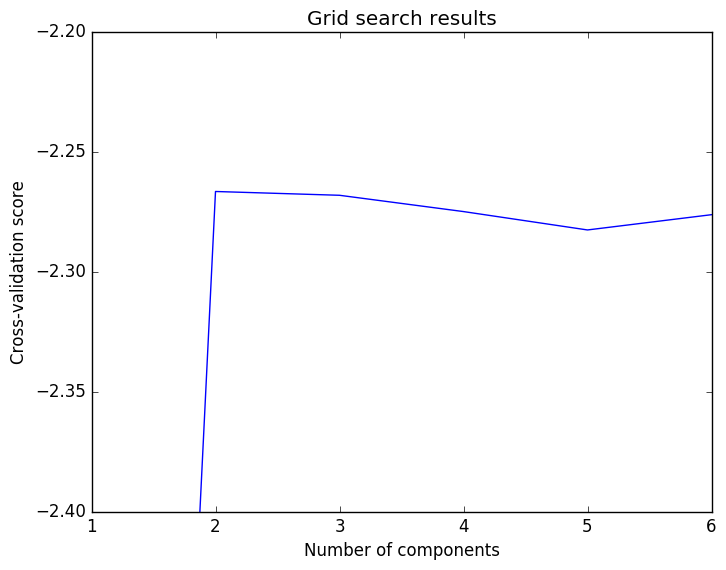

In [7]:
n_comps, results = zip([(first(values(gs.parameters)), gs.mean_validation_score) for gs in grid_search.grid_scores_]...);

plot(n_comps, results)
xlabel("Number of components")
ylabel("Cross-validation score")
title("Grid search results")
ylim([-2.4, -2.2]);